# Практическая работа № 8  
Численное решение двумерных задач  
Вариант 9

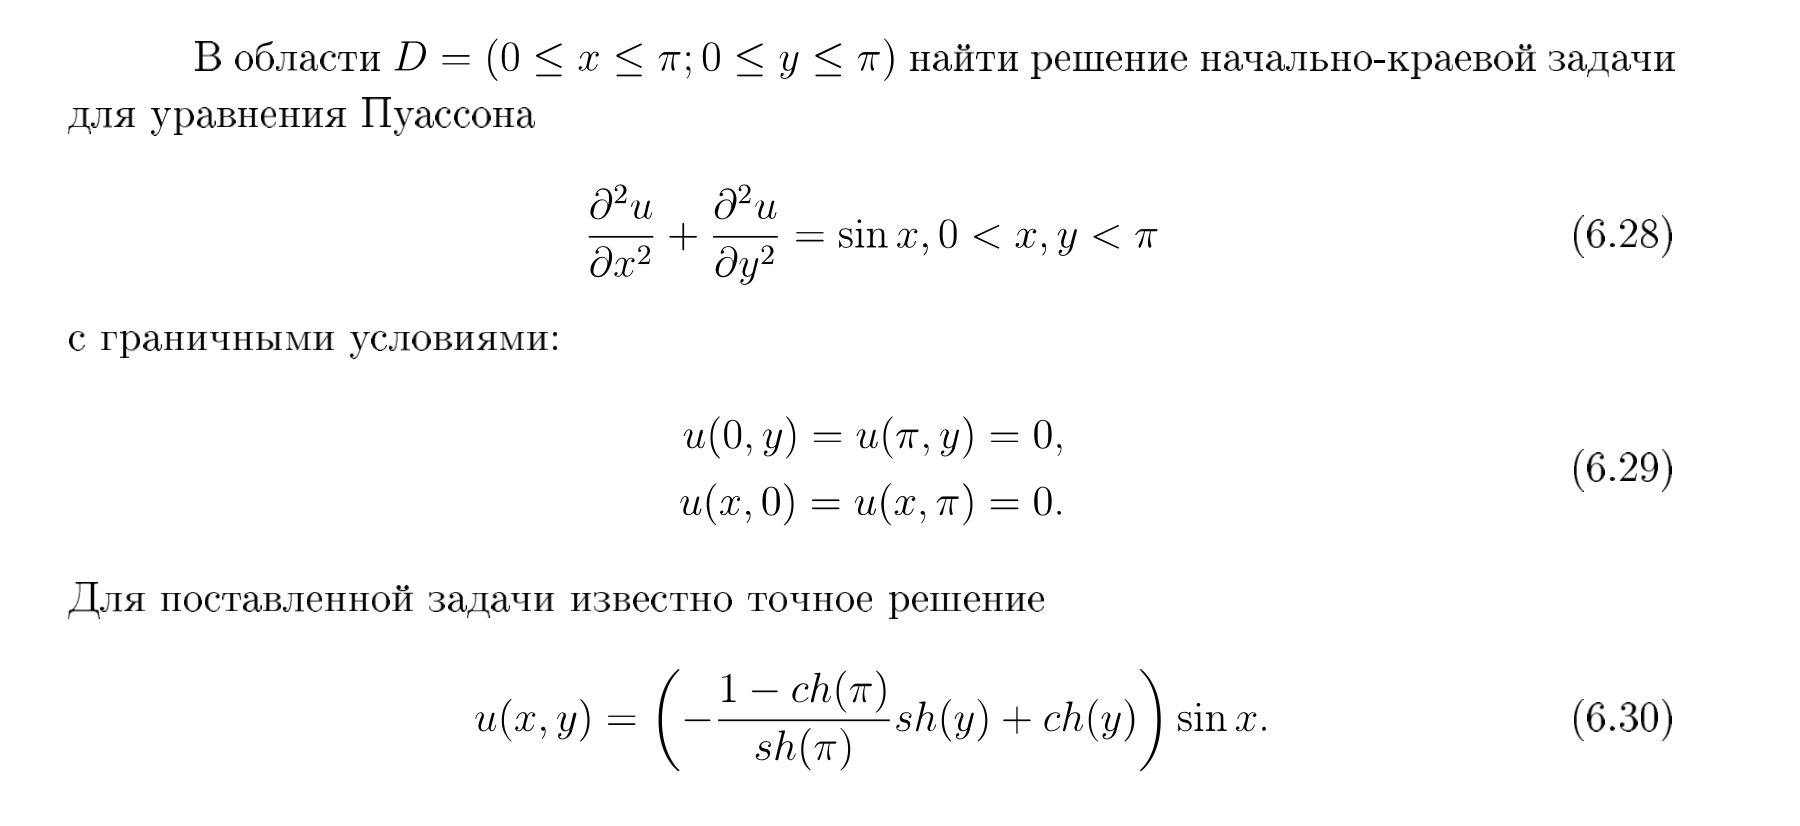

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def u(x, y):
    v = np.cosh(y) - np.sinh(y) * (1 - np.cosh(np.pi)) / np.sinh(np.pi)
    return v * np.sin(x)

In [ ]:
def f(x, y):
    return np.sin(x)

def mu_left(y):
    return 0

def mu_right(y):
    return 0

def mu_top(x):
    return 0

def mu_bottom(x):
    return 0

In [ ]:
def solve(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M, max_iter=5000, eps=1e-8):
    x = np.linspace(a, b, N)
    y = np.linspace(c, d, M)
    u = np.zeros((N, M))
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    for i in range(N):
        u[i, 0] = mu_bottom(x[i])
        u[i, -1] = mu_top(x[i])

    for j in range(M):
        u[0, j] = mu_left(y[j])
        u[-1, j] = mu_right(y[j])

    iters = 0
    for k in range(max_iter):
        max_diff = -np.inf
        for i in range(1, N-1):
            for j in range(1, M-1):
                v1 = hy**2 * (u[i-1, j] + u[i + 1, j])
                v2 = hx**2 * (u[i, j-1] + u[i, j+1])
                v3 = hx**2 * hy**2  * f(x[i], y[j])

                u_new = (v1 + v2 - v3) / (2 * (hx**2 + hy**2))

                diff = abs(u_new - u[i, j])
                max_diff = max(max_diff, diff)

                u[i, j] = u_new

        iters += 1
        if max_diff <= eps or iters >= max_iter:
            return u


    return u

In [ ]:
a = 0
b = np.pi

c = 0
d = np.pi

N = 300
M = 300

result = solve(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M)

In [ ]:
x = np.linspace(a, b, N)
y = np.linspace(c, d, M)
X, Y = np.meshgrid(x, y, indexing="ij")

u_exact = u(X, Y)

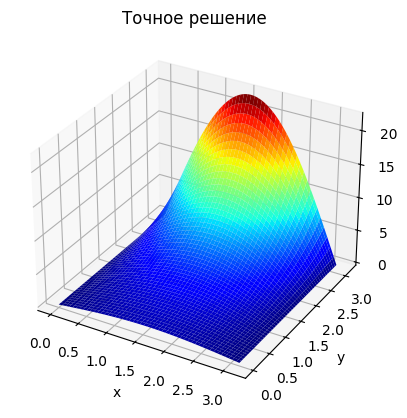

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Точное решение")
axes.plot_surface(X, Y, u(X, Y), cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

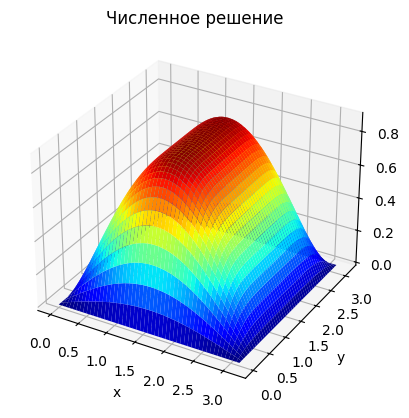

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Численное решение")
axes.plot_surface(X, Y, result, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

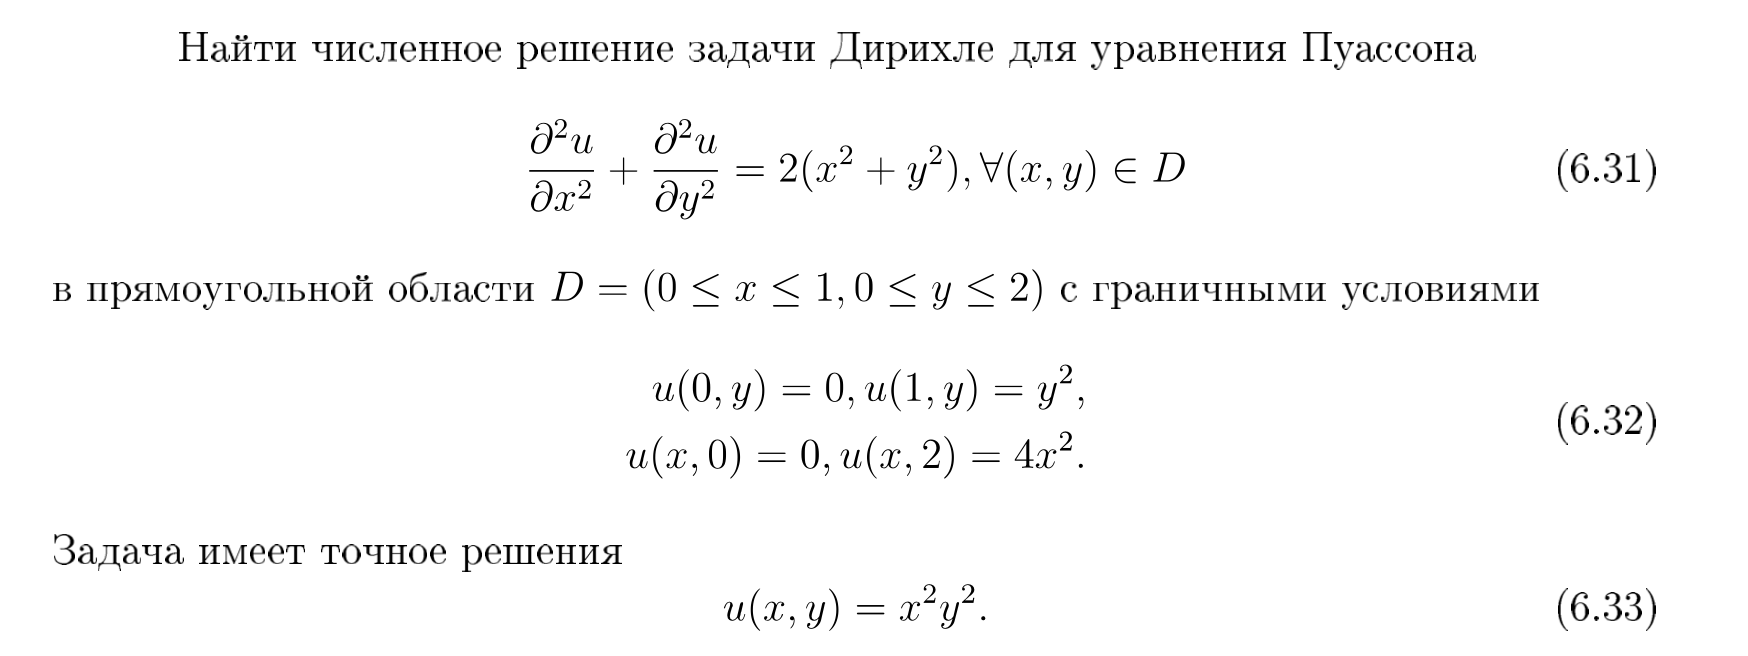

In [ ]:
def u(x, y):
    return x**2 * y**2

def f(x, y):
    return 2 * (x**2 + y**2)

def mu_left(y):
    return 0

def mu_right(y):
    return y**2

def mu_top(x):
    return 4 * x**2

def mu_bottom(x):
    return 0

In [ ]:
a = 0
b = 1

c = 0
d = 2

N = 40
M = 80

result = solve(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M)

In [ ]:
x = np.linspace(a, b, N)
y = np.linspace(c, d, M)
X, Y = np.meshgrid(x, y, indexing="ij")
u_exact = u(X, Y)

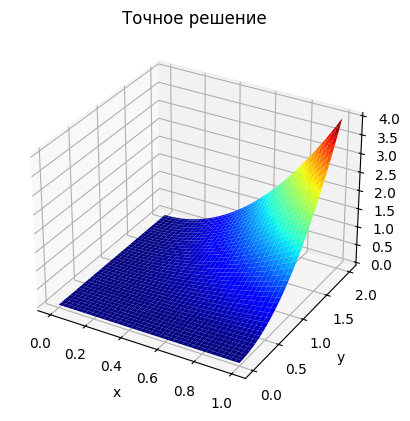

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Точное решение")
axes.plot_surface(X, Y, u(X, Y), cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

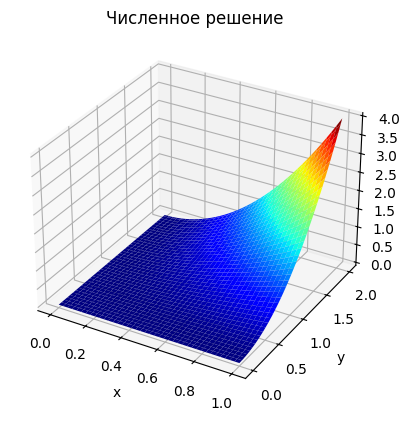

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Численное решение")
axes.plot_surface(X, Y, result, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

In [ ]:
a = 0
b = 1

c = 0
d = 2

In [ ]:
data = {
    "n": [],
    "N": [],
    "M": [],
    "err": [],
}

for n in range(5):
    N = 5 * 2**n
    M = 10 * 2**n

    x = np.linspace(a, b, N)
    y = np.linspace(c, d, M)
    X, Y = np.meshgrid(x, y, indexing="ij")

    u_exact = u(X, Y)
    result = solve(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M, max_iter=1000)

    err = np.max(abs(u_exact - result))

    data["n"].append(n)
    data["N"].append(N)
    data["M"].append(M)
    data["err"].append(err)

In [ ]:
display(pd.DataFrame(data))

,n,N,M,err
0,0,5,10,2.328360e-08
1,1,10,20,1.272303e-07
2,2,20,40,5.927184e-07
3,3,40,80,1.156516e-02
4,4,80,160,2.874138e-01
